In [ ]:
import cv2
!pip install pytesseract
import pytesseract


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load the two images
image1 = cv2.imread('/content/c.jpg')
image2 = cv2.imread('/content/c1.jpg')

In [ ]:
from IPython.display import Image

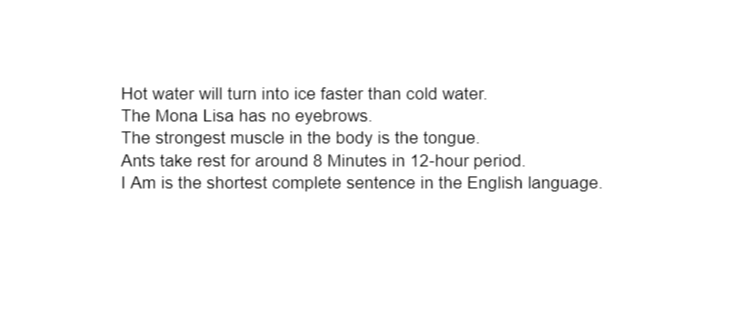

In [ ]:
Image(filename='/content/c.jpg')

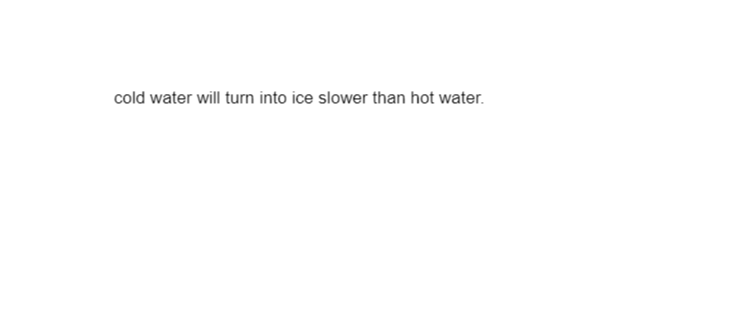

In [ ]:
Image(filename='/content/c1.jpg')

In [ ]:
# Preprocess the images
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!pip install pytesseract==0.3.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Apply OCR on the images
text1 = pytesseract.image_to_string(image1)
text2 = pytesseract.image_to_string(image2)

In [ ]:
text1

In [ ]:
text2

In [ ]:
# Sentence Tokenization

import nltk
nltk.download('punkt')



# Use NLTK's sent_tokenize method to split the text into sentences
sentences = nltk.sent_tokenize(text1)

# Store each sentence in a variable
nlp = []
for sentence in sentences:
    nlp.append(sentence)

print(nlp)

['Hot water will turn into ice faster than cold water.', 'The Mona Lisa has no eyebrows.', 'The strongest muscle in the body is the tongue.', 'Ants take rest for around 8 Minutes in 12-hour period.', '1 Am is the shortest complete sentence in the English language.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# SENTENCE TRANSFORMERS

!pip install -q sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer,util

In [ ]:
import torch

#downloading pre-trained sentence embedded models

symmetric_embedder=SentenceTransformer('all-mpnet-base-v2')

In [ ]:
# Encoding the corpus

corpus=symmetric_embedder.encode(nlp)

In [ ]:
# Encoding the query

query_embedding=symmetric_embedder.encode(text2,convert_to_tensor=True)

In [ ]:
s=util.semantic_search(query_embedding,corpus)

In [ ]:
s.sort

<function list.sort(*, key=None, reverse=False)>

In [ ]:
s

[[{'corpus_id': 0, 'score': 0.9614593982696533},
  {'corpus_id': 2, 'score': 0.19020195305347443},
  {'corpus_id': 3, 'score': 0.13899663090705872},
  {'corpus_id': 4, 'score': 0.13165439665317535},
  {'corpus_id': 1, 'score': 0.11055818200111389}]]

In [ ]:
import pandas as pd

In [ ]:
similarity_score =pd.DataFrame([s[0][0],s[0][1],s[0][2],s[0][3],s[0][4]])

In [ ]:
similarity_score

,corpus_id,score
0,0,0.961459
1,2,0.190202
2,3,0.138997
3,4,0.131654
4,1,0.110558
